# Assignment 2 - SARSA

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>


## Importing packages

In [1]:
import gymnasium as gym
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import os


os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
rnd = np.random.default_rng(112233)

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>
<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>

## Building Frozen lake 

In [2]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode='ansi')

matrix = np.zeros((env.observation_space.n, env.action_space.n))

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>

## Building Sarsa class

In [3]:
class sarsa():
    def __init__(self, decision_matrix, alpha=.85, gamma=.95, temperature=.05, expected=False):
        self.a = alpha
        self.g = gamma
        self.q = decision_matrix
        self.temp = temperature
        self.expected = expected

        return

    def update(self, reward, state, action, next_state, next_action=None):  # next action can be none in the expected

        if self.expected: 
            self.q[state, action] = self.q[state, action] + self.a * (
                    reward + self.g * np.sum(self.q[next_state, :] * self.boltzmann(next_state))
                    - self.q[state, action])
        else:
            self.q[state, action] = self.q[state, action] + self.a * (
                    reward + self.g * self.q[next_state, next_action] - self.q[state, action])

        return None

    def choose(self, env, state, greedy):

        if np.argmax(self.q[state]) == 0:
            # random sampling
            chosen = rnd.choice(list(range(env.action_space.n)))
        elif greedy or (self.temp <= 0):  # temp 0 means greedy, and cannot go to boltzmann to avoid division by 0
            # greedy choice
            chosen = np.argmax(self.q[state])
        else:
            # boltzmann probability
            prob = self.boltzmann(state)
            chosen = rnd.choice(list(range(env.action_space.n)), p=prob)

        return chosen

    def boltzmann(self, state):
        actions = np.divide(self.q[state], self.temp)
        upper = np.exp(actions)
        lower = np.sum(upper)
        return upper / lower

        

<div style="border-bottom: 3px solid black; margin-bottom:5px"></div>

## Running the model

In [4]:
# defining one episode
def episode(model, env, greedy=0):
    env.reset()
    state = 0  # initializing the state
    ended = False
    reward = 0

    if not model.expected:
        # Choose A from S
        action = model.choose(env, state, greedy)

    while not ended:

        if model.expected:
            # Choose A from S
            action = model.choose(env, state, greedy)

        # take A from S and get S'
        new_state, reward, ended, time_limit, prob = env.step(action)

        if model.expected:
            # updating
            model.update(reward, state, action, new_state, None)
        else:
            # choose A' from S'
            new_action = model.choose(env, new_state, greedy)
            # updating
            model.update(reward, state, action, new_state, new_action)
            # A <- A'
            action = new_action

        # S <- S'
        state = new_state

        if time_limit:
            break

    return reward

In [5]:
# defining process for each of the segments
def segment(model, env, training):
    segment_results = []

    for i, mode in enumerate(training):
        print(f"-{i + 1}", end='')
        episode_result = episode(model, env, mode)
        segment_results.append(episode_result)

    return segment_results

In [6]:
# defining process for each of the runs
def run(model, env, segments_n=500, training=np.append(np.zeros(10), [-1])):
    run_results = []
    for i, mode in enumerate(range(segments_n)):
        print(f"\n{i + 1}th Segment:", end='')
        segment_results = segment(model, env, training)
        run_results.append(segment_results)

    return np.array(run_results)

In [7]:
# Declaring the model
model = sarsa(matrix, expected=True)

In [8]:
# Runing the training

results = run(model,env)


1th Segment:-1-2-3-4-5-6-7-8-9-10-11
2th Segment:-1-2-3-4-5-6-7-8-9-10-11
3th Segment:-1-2-3-4-5-6-7-8-9-10-11
4th Segment:-1-2-3-4-5-6-7-8-9-10-11
5th Segment:-1-2-3-4-5-6-7-8-9-10-11
6th Segment:-1-2-3-4-5-6-7-8-9-10-11
7th Segment:-1-2-3-4-5-6-7-8-9-10-11
8th Segment:-1-2-3-4-5-6-7-8-9-10-11
9th Segment:-1-2-3-4-5-6-7-8-9-10-11
10th Segment:-1-2-3-4-5-6-7-8-9-10-11
11th Segment:-1-2-3-4-5-6-7-8-9-10-11
12th Segment:-1-2-3-4-5-6-7-8-9-10-11
13th Segment:-1-2-3-4-5-6-7-8-9-10-11
14th Segment:-1-2-3-4-5-6-7-8-9-10-11
15th Segment:-1-2-3-4-5-6-7-8-9-10-11
16th Segment:-1-2-3-4-5-6-7-8-9-10-11
17th Segment:-1-2-3-4-5-6-7-8-9-10-11
18th Segment:-1-2-3-4-5-6-7-8-9-10-11
19th Segment:-1-2-3-4-5-6-7-8-9-10-11
20th Segment:-1-2-3-4-5-6-7-8-9-10-11
21th Segment:-1-2-3-4-5-6-7-8-9-10-11
22th Segment:-1-2-3-4-5-6-7-8-9-10-11
23th Segment:-1-2-3-4-5-6-7-8-9-10-11
24th Segment:-1-2-3-4-5-6-7-8-9-10-11
25th Segment:-1-2-3-4-5-6-7-8-9-10-11
26th Segment:-1-2-3-4-5-6-7-8-9-10-11
27th Segment:-1-2-3-

259th Segment:-1-2-3-4-5-6-7-8-9-10-11
260th Segment:-1-2-3-4-5-6-7-8-9-10-11
261th Segment:-1-2-3-4-5-6-7-8-9-10-11
262th Segment:-1-2-3-4-5-6-7-8-9-10-11
263th Segment:-1-2-3-4-5-6-7-8-9-10-11
264th Segment:-1-2-3-4-5-6-7-8-9-10-11
265th Segment:-1-2-3-4-5-6-7-8-9-10-11
266th Segment:-1-2-3-4-5-6-7-8-9-10-11
267th Segment:-1-2-3-4-5-6-7-8-9-10-11
268th Segment:-1-2-3-4-5-6-7-8-9-10-11
269th Segment:-1-2-3-4-5-6-7-8-9-10-11
270th Segment:-1-2-3-4-5-6-7-8-9-10-11
271th Segment:-1-2-3-4-5-6-7-8-9-10-11
272th Segment:-1-2-3-4-5-6-7-8-9-10-11
273th Segment:-1-2-3-4-5-6-7-8-9-10-11
274th Segment:-1-2-3-4-5-6-7-8-9-10-11
275th Segment:-1-2-3-4-5-6-7-8-9-10-11
276th Segment:-1-2-3-4-5-6-7-8-9-10-11
277th Segment:-1-2-3-4-5-6-7-8-9-10-11
278th Segment:-1-2-3-4-5-6-7-8-9-10-11
279th Segment:-1-2-3-4-5-6-7-8-9-10-11
280th Segment:-1-2-3-4-5-6-7-8-9-10-11
281th Segment:-1-2-3-4-5-6-7-8-9-10-11
282th Segment:-1-2-3-4-5-6-7-8-9-10-11
283th Segment:-1-2-3-4-5-6-7-8-9-10-11
284th Segment:-1-2-3-4-5-

In [9]:
general_result = results.flatten()


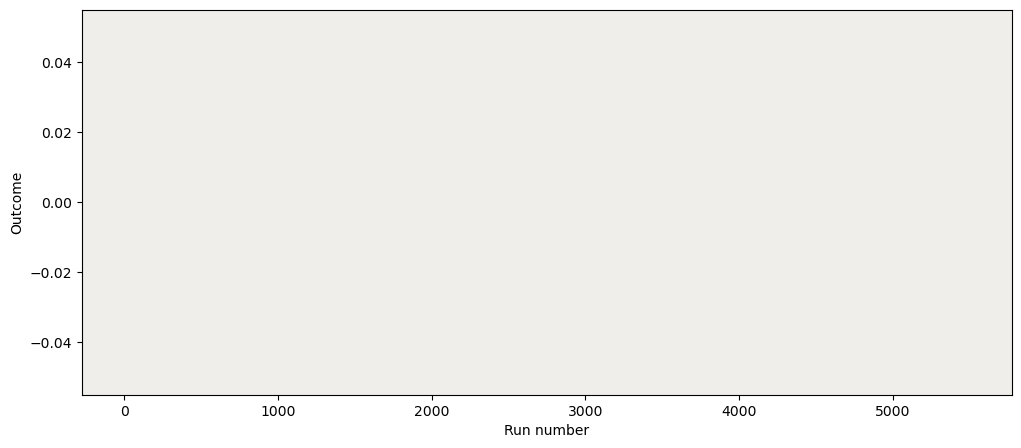

In [10]:
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(general_result)), general_result, color="#0A047A", width=1.0)
plt.show()
